## 2024 Olympics Data Analysis - Classification Project

This project will explore a Kaggle dataset related to the 2024 Paris Olympics, focusing on data about athletes, medals won, and countries. After conducting exploratory data analysis (EDA) to uncover data trends, such as the relationships between athlete characteristics and medal wins and the influence of country and nationality, I will perform feature importance analysis using various models to identify the most predictive variables. This Jupyter notebook will document the project's steps, and segments of code showcased here will be used in the final report.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, os

In [2]:
athletes_df = pd.read_csv('data/athletes.csv')
events_df = pd.read_csv('data/events.csv')
medallists_df = pd.read_csv('data/medallists.csv')
medals_total_df = pd.read_csv('data/medals_total.csv')
medals_df = pd.read_csv('data/medals.csv')

In [3]:
print(athletes_df.head())
print(events_df.head())
print(medallists_df.head())
print(medals_total_df.head())
print(medals_df.head())

      code  current               name     name_short            name_tv  \
0  1532872     True   ALEKSANYAN Artur   ALEKSANYAN A   Artur ALEKSANYAN   
1  1532873     True     AMOYAN Malkhas       AMOYAN M     Malkhas AMOYAN   
2  1532874     True    GALSTYAN Slavik     GALSTYAN S    Slavik GALSTYAN   
3  1532944     True  HARUTYUNYAN Arsen  HARUTYUNYAN A  Arsen HARUTYUNYAN   
4  1532945     True    TEVANYAN Vazgen     TEVANYAN V    Vazgen TEVANYAN   

  gender function country_code  country country_long  ...  \
0   Male  Athlete          ARM  Armenia      Armenia  ...   
1   Male  Athlete          ARM  Armenia      Armenia  ...   
2   Male  Athlete          ARM  Armenia      Armenia  ...   
3   Male  Athlete          ARM  Armenia      Armenia  ...   
4   Male  Athlete          ARM  Armenia      Armenia  ...   

                                              family  \
0                          Father, Gevorg Aleksanyan   
1                                                NaN   
2       

In [4]:
print(athletes_df['code'].dtype)
print(medals_df['code'].dtype)

int64
object


In [5]:
# converting data types
athletes_df['code'] = athletes_df['code'].astype(str)
medallists_df['code_athlete'] = medallists_df['code_athlete'].astype(str)
medals_df['code'] = medals_df['code'].astype(str)

In [6]:
# merging athletes with medallists on athlete code
final_df = pd.merge(
    athletes_df,
    medallists_df[['code_athlete', 'medal_type', 'medal_code', 'medal_date']],
    left_on='code',
    right_on='code_athlete',
    how='left'  # Left join for all athletes
)

In [7]:
# renaming cols
final_clean_df = final_df[[
    'code',           # Athlete ID
    'name',           # Name of the athlete
    'gender',         # Gender
    'country_code',   # Country code
    'country',        # Country
    'nationality_code',  # Nationality code
    'nationality',    # Nationality
    'disciplines',    # Disciplines
    'events',         # Events
    'birth_date',     # Birth date
    'birth_country',  # Birth country
    'hobbies',        # Hobbies
    'occupation',     # Occupation
    'lang',           # Languages spoken
    'reason',         # Reason for participating
    'hero',           # Hero
    'medal_type',     # Medal type (from medallists_df)
    'medal_code',     # Medal code (from medallists_df)
    'medal_date'      # Medal date (from medallists_df)
]]

#
final_clean_df = final_clean_df.rename(columns={
    'code': 'athlete_code'
})

# 'has_medal' column: True if the athlete has any medal, False otherwise
final_clean_df['has_medal'] = final_clean_df['medal_type'].notna()

In [8]:
# replacing NaN in medal-related columns w/ 'None'
final_clean_df['medal_type'] = final_clean_df['medal_type'].fillna('None')
final_clean_df['medal_code'] = final_clean_df['medal_code'].fillna('None')
final_clean_df['medal_date'] = final_clean_df['medal_date'].fillna('None')

#saving final to csv
final_clean_df.to_csv('data/final_merged_data.csv', index=False)


In [9]:
print(final_clean_df.head())
print(final_clean_df.columns)

  athlete_code               name gender country_code  country  \
0      1532872   ALEKSANYAN Artur   Male          ARM  Armenia   
1      1532873     AMOYAN Malkhas   Male          ARM  Armenia   
2      1532874    GALSTYAN Slavik   Male          ARM  Armenia   
3      1532944  HARUTYUNYAN Arsen   Male          ARM  Armenia   
4      1532945    TEVANYAN Vazgen   Male          ARM  Armenia   

  nationality_code nationality    disciplines                      events  \
0              ARM     Armenia  ['Wrestling']  ["Men's Greco-Roman 97kg"]   
1              ARM     Armenia  ['Wrestling']  ["Men's Greco-Roman 77kg"]   
2              ARM     Armenia  ['Wrestling']  ["Men's Greco-Roman 67kg"]   
3              ARM     Armenia  ['Wrestling']    ["Men's Freestyle 57kg"]   
4              ARM     Armenia  ['Wrestling']    ["Men's Freestyle 65kg"]   

   birth_date birth_country                        hobbies occupation  \
0  1991-10-21       Armenia  Playing and watching football    Athle

In [10]:
print(final_clean_df.shape)
print(final_clean_df.info())

(11374, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374 entries, 0 to 11373
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   athlete_code      11374 non-null  object
 1   name              11374 non-null  object
 2   gender            11374 non-null  object
 3   country_code      11374 non-null  object
 4   country           11374 non-null  object
 5   nationality_code  11371 non-null  object
 6   nationality       11371 non-null  object
 7   disciplines       11374 non-null  object
 8   events            11374 non-null  object
 9   birth_date        11374 non-null  object
 10  birth_country     9726 non-null   object
 11  hobbies           4371 non-null   object
 12  occupation        9825 non-null   object
 13  lang              10864 non-null  object
 14  reason            6046 non-null   object
 15  hero              3457 non-null   object
 16  medal_type        11374 non-null  object
 17  

In [11]:
# Check for missing values
print(final_clean_df.isnull().sum())

athlete_code           0
name                   0
gender                 0
country_code           0
country                0
nationality_code       3
nationality            3
disciplines            0
events                 0
birth_date             0
birth_country       1648
hobbies             7003
occupation          1549
lang                 510
reason              5328
hero                7917
medal_type             0
medal_code             0
medal_date             0
has_medal              0
dtype: int64


In [12]:
# Convert 'medal_code' to numeric, coerce errors to turn non-numeric values into NaN
final_clean_df['medal_code'] = pd.to_numeric(final_clean_df['medal_code'], errors='coerce')

# Now fill missing values with the mean of the numeric values
final_clean_df['medal_code'].fillna(final_clean_df['medal_code'].mean(), inplace=True)

# Create 'age' variable
final_clean_df['birth_date'] = pd.to_datetime(final_clean_df['birth_date'], errors='coerce')
final_clean_df['age'] = 2024 - final_clean_df['birth_date'].dt.year

C:\Users\aryaa\AppData\Local\Temp\ipykernel_6984\527665917.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_clean_df['medal_code'].fillna(final_clean_df['medal_code'].mean(), inplace=True)


In [13]:
# Descriptive statistics
print(final_clean_df.describe())

total_athletes = final_clean_df['athlete_code'].nunique()
total_medalists = final_clean_df[final_clean_df['has_medal']].shape[0]

print(f"Total athletes: {total_athletes}")
print(f"Total athletes with medals: {total_medalists}")

                          birth_date    medal_code           age
count                          11374  11374.000000  11374.000000
mean   1997-07-21 16:40:10.550377984      2.023336     26.931247
min              1954-12-01 00:00:00      1.000000     12.000000
25%              1994-08-04 00:00:00      2.023336     23.000000
50%              1998-02-14 00:00:00      2.023336     26.000000
75%              2001-03-29 00:00:00      2.023336     30.000000
max              2012-08-11 00:00:00      3.000000     70.000000
std                              NaN      0.369973      5.394881
Total athletes: 11113
Total athletes with medals: 2315


In [14]:
print(final_clean_df.shape)
print(final_clean_df.info())

(11374, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374 entries, 0 to 11373
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   athlete_code      11374 non-null  object        
 1   name              11374 non-null  object        
 2   gender            11374 non-null  object        
 3   country_code      11374 non-null  object        
 4   country           11374 non-null  object        
 5   nationality_code  11371 non-null  object        
 6   nationality       11371 non-null  object        
 7   disciplines       11374 non-null  object        
 8   events            11374 non-null  object        
 9   birth_date        11374 non-null  datetime64[ns]
 10  birth_country     9726 non-null   object        
 11  hobbies           4371 non-null   object        
 12  occupation        9825 non-null   object        
 13  lang              10864 non-null  object        
 14  reason    

## Exploratory Data Analysis

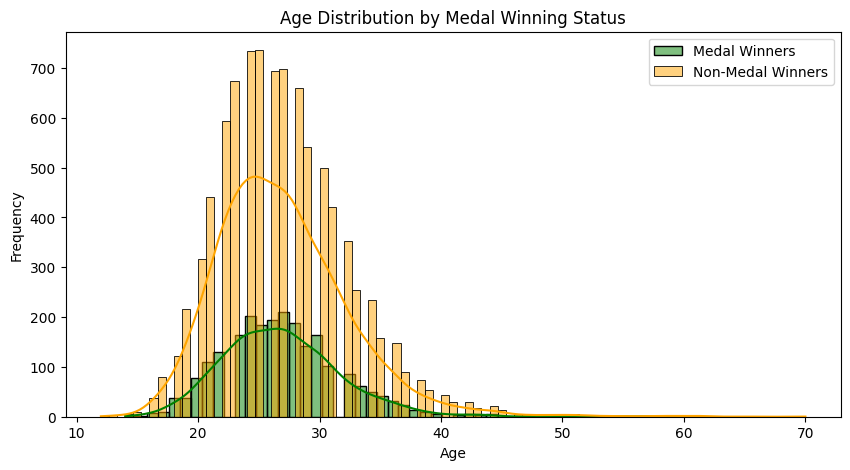

In [15]:
# Distribution of age among medal winners and non-winners
plt.figure(figsize=(10, 5))
sns.histplot(final_clean_df[final_clean_df['has_medal'] == True]['age'], color='green', label='Medal Winners', kde=True)
sns.histplot(final_clean_df[final_clean_df['has_medal'] == False]['age'], color='orange', label='Non-Medal Winners', kde=True)
plt.title('Age Distribution by Medal Winning Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

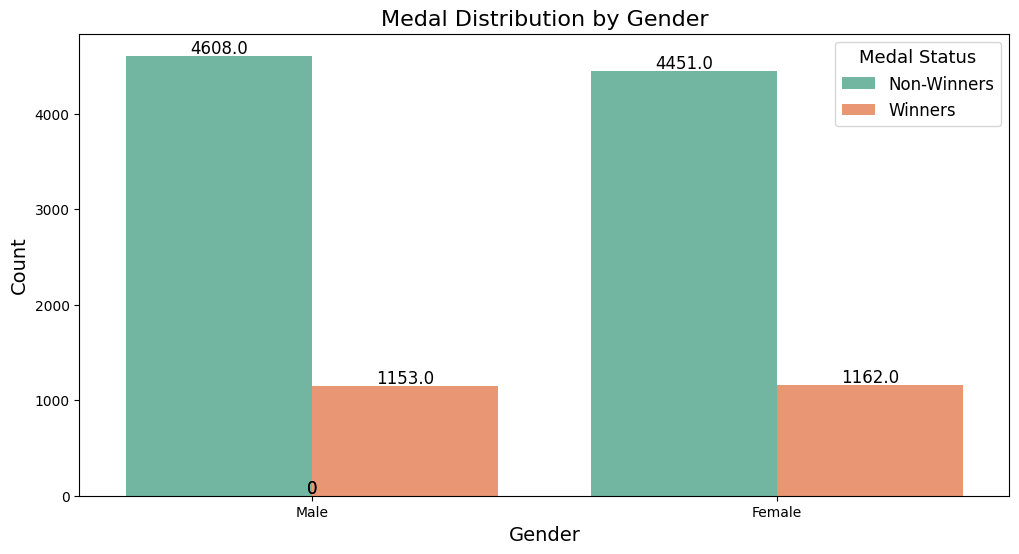

In [16]:
# Medal Distribution by Gender Plot
plt.figure(figsize=(12, 6))  # Slightly wider for better readability
sns.countplot(x='gender', hue='has_medal', data=final_clean_df, palette='Set2')

# Set titles and labels with increased font sizes
plt.title('Medal Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust legend and add data labels
plt.legend(title='Medal Status', loc='upper right', labels=['Non-Winners', 'Winners'], fontsize=12, title_fontsize='13')

# Adding data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

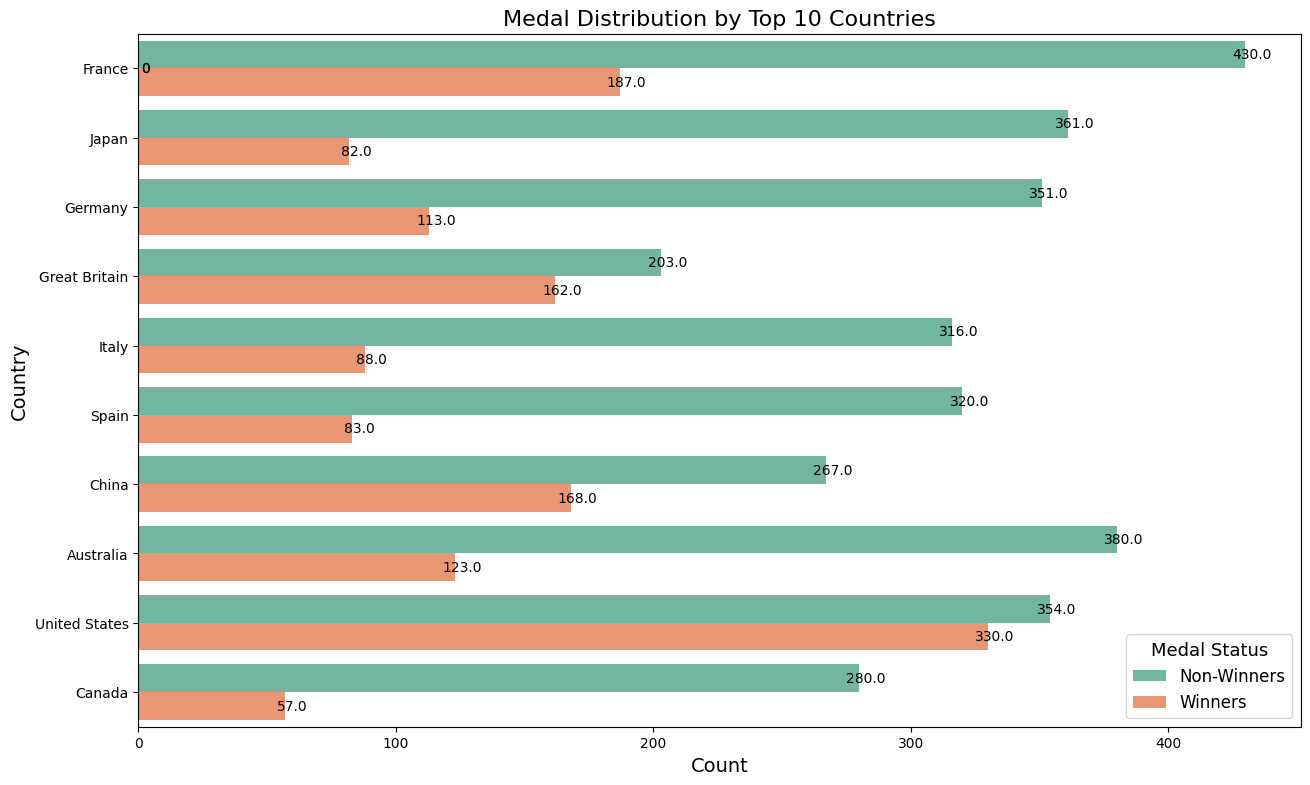

In [17]:
# Medal distribution by country
top_countries = final_clean_df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 9))  # Bigger figure size for clarity
sns.countplot(y='country', hue='has_medal', data=final_clean_df[final_clean_df['country'].isin(top_countries)], palette='Set2')

# Set titles and labels with increased font sizes
plt.title('Medal Distribution by Top 10 Countries', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Adjust legend
plt.legend(title='Medal Status', loc='lower right', labels=['Non-Winners', 'Winners'], fontsize=12, title_fontsize='13')

# Adding data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(5, 0),
                       textcoords='offset points')

plt.show()

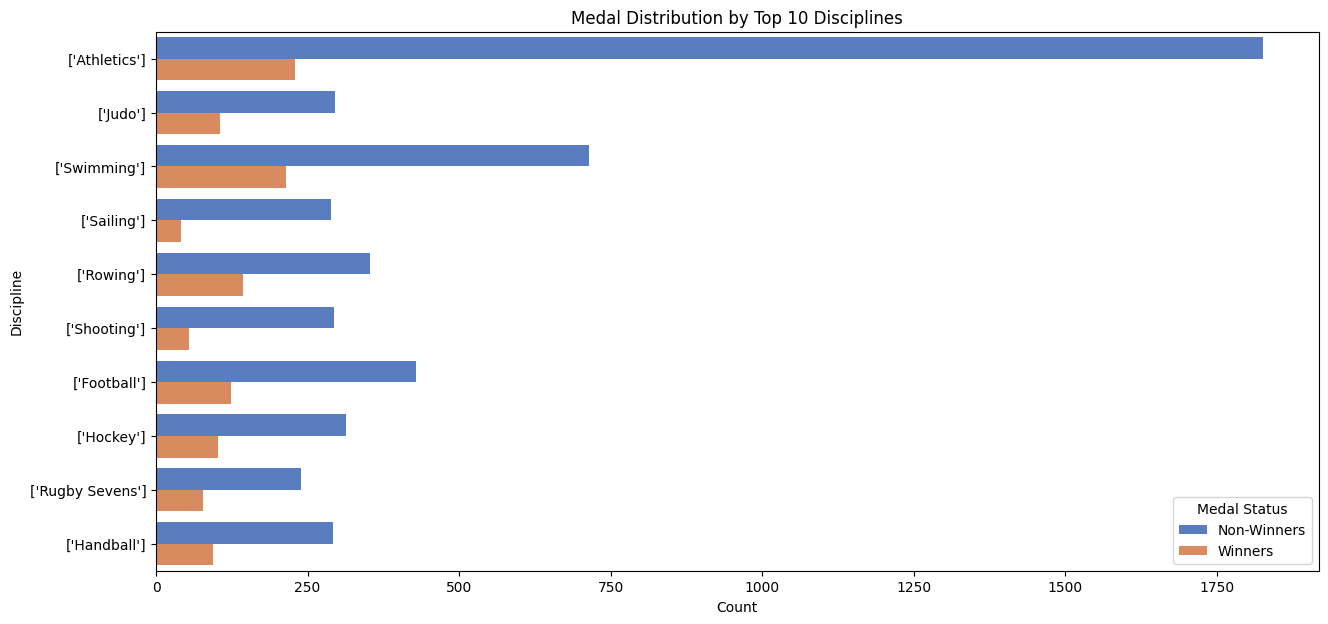

In [18]:
# Medal distribution by discipline
top_disciplines = final_clean_df['disciplines'].value_counts().head(10).index
plt.figure(figsize=(15, 7))
sns.countplot(y='disciplines', hue='has_medal', data=final_clean_df[final_clean_df['disciplines'].isin(top_disciplines)], palette='muted')
plt.title('Medal Distribution by Top 10 Disciplines')
plt.xlabel('Count')
plt.ylabel('Discipline')
plt.legend(title='Medal Status', loc='lower right', labels=['Non-Winners', 'Winners'])
plt.show()


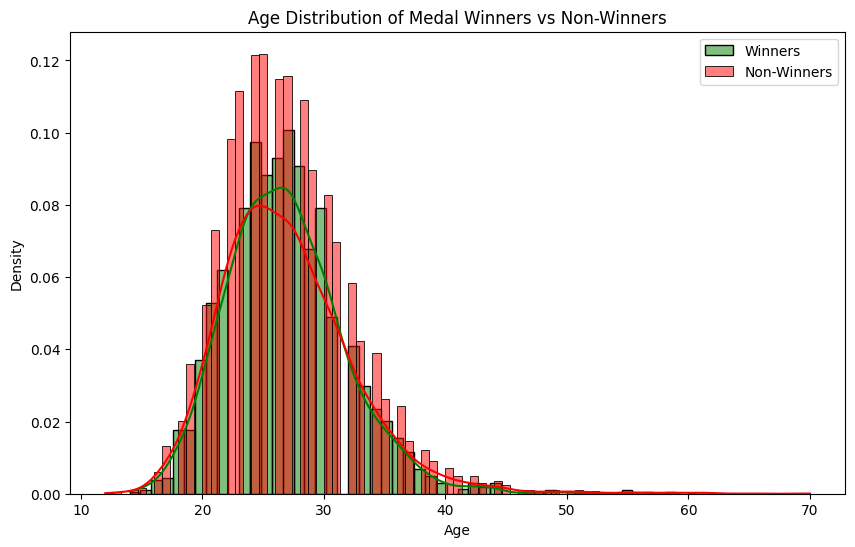

In [19]:
# Age distribution by medal status
plt.figure(figsize=(10, 6))
sns.histplot(final_clean_df[final_clean_df['has_medal'] == True]['age'], color='green', label='Winners', kde=True, stat="density", common_norm=False)
sns.histplot(final_clean_df[final_clean_df['has_medal'] == False]['age'], color='red', label='Non-Winners', kde=True, stat="density", common_norm=False)
plt.title('Age Distribution of Medal Winners vs Non-Winners')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


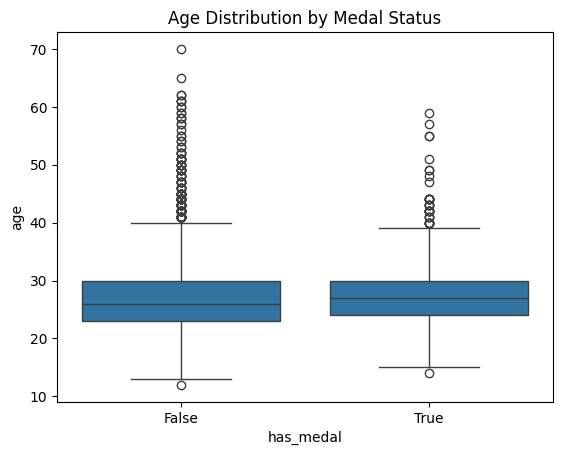

In [20]:
# Relationship between age and medals
sns.boxplot(data=final_clean_df, x='has_medal', y='age')
plt.title('Age Distribution by Medal Status')
plt.show()


In [21]:
# Cross-tabulation for gender and discipline
cross_tab = pd.crosstab(final_clean_df['gender'], final_clean_df['disciplines'])
print(cross_tab)

# Chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square Test p-value: {p}")


disciplines  ['3x3 Basketball', 'Basketball']  ['3x3 Basketball']  \
gender                                                              
Female                                      1                  32   
Male                                        0                  32   

disciplines  ['Archery']  ['Artistic Gymnastics']  ['Artistic Swimming']  \
gender                                                                     
Female                67                      105                    108   
Male                  68                      107                      0   

disciplines  ['Athletics']  ['Badminton']  ['Basketball']  \
gender                                                      
Female                1006             87             143   
Male                  1050             88             144   

disciplines  ['Beach Volleyball']  ['Boxing']  ...  ['Taekwondo']  ['Tennis']  \
gender                                         ...                              
Female     

## Cleaning Before Modeling

In [22]:
# Fill missing nationality and nationality_code with the most frequent value (mode)
final_clean_df['nationality_code'].fillna(final_clean_df['nationality_code'].mode()[0], inplace=True)
final_clean_df['nationality'].fillna(final_clean_df['nationality'].mode()[0], inplace=True)

# Fill birth_country with 'Unknown' if not critical to the analysis
final_clean_df['birth_country'].fillna('Unknown', inplace=True)

# Fill hobbies and occupation with 'Unknown' or 'None'
final_clean_df['hobbies'].fillna('Unknown', inplace=True)
final_clean_df['occupation'].fillna('Unknown', inplace=True)

# Fill language with 'Unknown'
final_clean_df['lang'].fillna('Unknown', inplace=True)

# Fill reason and hero with 'Unknown'
final_clean_df['reason'].fillna('Unknown', inplace=True)
final_clean_df['hero'].fillna('Unknown', inplace=True)

# Verify that missing values have been handled
final_clean_df.isnull().sum()  # Should show 0 missing values for all columns


C:\Users\aryaa\AppData\Local\Temp\ipykernel_6984\4062084975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_clean_df['nationality_code'].fillna(final_clean_df['nationality_code'].mode()[0], inplace=True)
C:\Users\aryaa\AppData\Local\Temp\ipykernel_6984\4062084975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

athlete_code        0
name                0
gender              0
country_code        0
country             0
nationality_code    0
nationality         0
disciplines         0
events              0
birth_date          0
birth_country       0
hobbies             0
occupation          0
lang                0
reason              0
hero                0
medal_type          0
medal_code          0
medal_date          0
has_medal           0
age                 0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

# Convert 'birth_date' to age
final_clean_df['birth_date'] = pd.to_datetime(final_clean_df['birth_date'], errors='coerce')
final_clean_df['age'] = (pd.to_datetime('2024-07-01') - final_clean_df['birth_date']).dt.days // 365

# Label encode categorical variables (LabelEncoder can be replaced by OneHotEncoding if needed)
le = LabelEncoder()

final_clean_df['gender_encoded'] = le.fit_transform(final_clean_df['gender'])
final_clean_df['country_encoded'] = le.fit_transform(final_clean_df['country'])
final_clean_df['nationality_encoded'] = le.fit_transform(final_clean_df['nationality'])
final_clean_df['discipline_encoded'] = le.fit_transform(final_clean_df['disciplines'].astype(str))
final_clean_df['event_encoded'] = le.fit_transform(final_clean_df['events'].astype(str))
final_clean_df['occupation_encoded'] = le.fit_transform(final_clean_df['occupation'].astype(str))
final_clean_df['medal_type_encoded'] = le.fit_transform(final_clean_df['medal_type'].astype(str))
final_clean_df['lang_encoded'] = le.fit_transform(final_clean_df['lang'].astype(str))


## Models + Results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define feature columns (include all relevant encoded features)
features = [
    'gender_encoded', 'country_encoded', 'nationality_encoded', 'age',
    'discipline_encoded', 'event_encoded', 'occupation_encoded', 'lang_encoded'
]

# Define the target variable
target = final_clean_df['has_medal'].astype(int)  # Binary target: has_medal (True/False)

In [34]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(final_clean_df[features], final_clean_df['has_medal'], test_size=0.2, random_state=42)

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Model 3: Support Vector Machine (SVM)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


Logistic Regression Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275
   macro avg       0.39      0.50      0.44      2275
weighted avg       0.62      0.79      0.70      2275



C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Random Forest Accuracy: 0.8861538461538462
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      1796
        True       0.83      0.58      0.68       479

    accuracy                           0.89      2275
   macro avg       0.86      0.77      0.81      2275
weighted avg       0.88      0.89      0.88      2275

SVM Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275
   macro avg       0.39      0.50      0.44      2275
weighted avg       0.62      0.79      0.70      2275



C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [36]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# SVM
print("SVM:")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


Logistic Regression:
Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275
   macro avg       0.39      0.50      0.44      2275
weighted avg       0.62      0.79      0.70      2275

Random Forest:
Accuracy: 0.8861538461538462
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      1796
        True       0.83      0.58      0.68       479

    accuracy                           0.89      2275
   macro avg       0.86      0.77      0.81      2275
weighted avg       0.88      0.89      0.88      2275

SVM:
Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275


C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

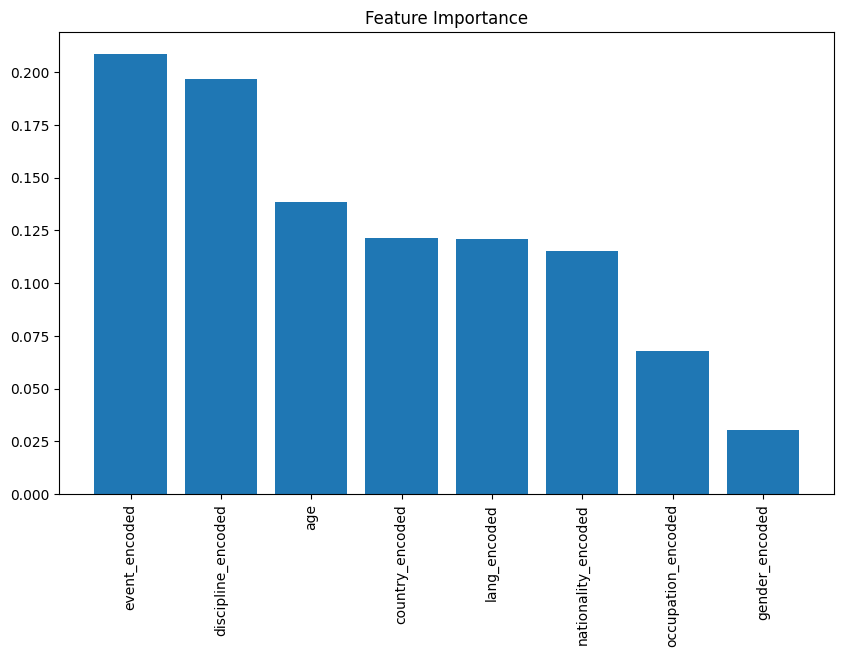

In [35]:
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()


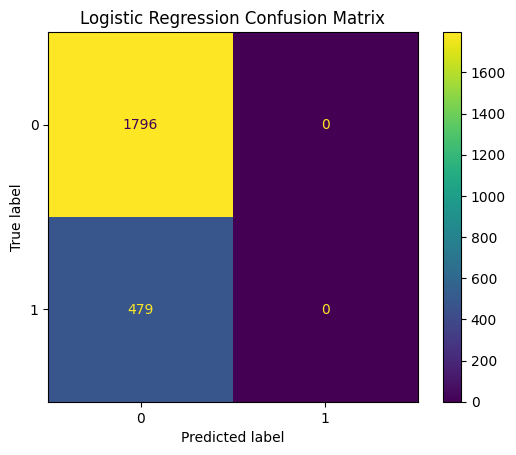

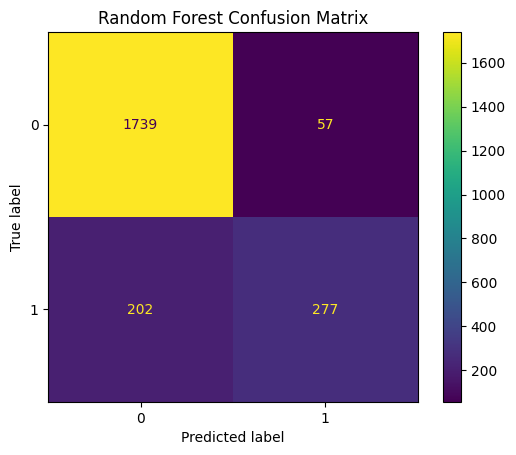

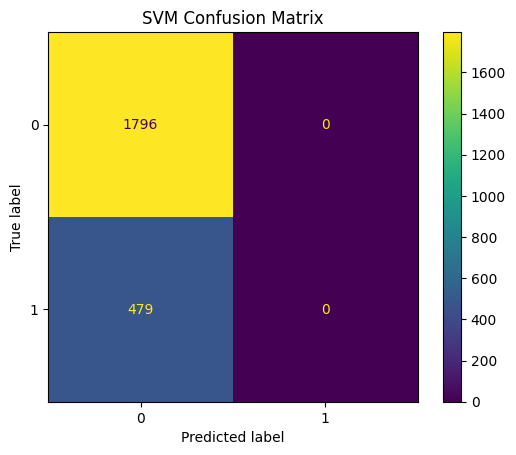

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_preds)
ConfusionMatrixDisplay(confusion_matrix=lr_cm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(confusion_matrix=rf_cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM Confusion Matrix
svc_cm = confusion_matrix(y_test, svc_preds)
ConfusionMatrixDisplay(confusion_matrix=svc_cm).plot()
plt.title("SVM Confusion Matrix")
plt.show()


## Key Findings

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\aryaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\__init__.py)

## Next Steps